In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from category_encoders import TargetEncoder

#### Reading dataset.csv

In [2]:
df = pd.read_csv('./data/dataset.csv', low_memory=False)
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df.rename(columns = {'country': 'circuit_country'}, inplace = True)
df.drop(columns=['index'], inplace=True)
df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'circuit_id', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'resultId', 'driverId',
       'constructorId', 'car_number', 'grid', 'results_positionOrder',
       'results_points', 'laps', 'milliseconds', 'fastestLap',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'status',
       'circuit_location', 'circuit_country', 'constructorStandingsId',
       'constructor_points', 'constructor_position', 'constructor_wins',
       'constructorRef', 'constructor_nationality', 'driverRef',
       'driver_number', 'driver_code', 'forename', 'dob', 'driver_nationality',
       'driverStandingsId', 'driver_points', 'driver_position', 'driver_wins',
       'qualifyId', 'number', 'qualifying_position', 'q1_time', 'q2_time',
       'q3_time', 'no_of_stops', 'ms_avg', 'first_5_avg_time',
       'last_10_avg_time', 'lap_position_after_5',
       'lap_position_before_last_10'],


#### Dropping the columns

In [3]:
cols_to_be_dropped = ['raceId', 'year', 'round', 'name', 'time', 'circuit_id', 'car_number', 'resultId', 'driverRef', 'results_points', 'laps', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'first_5_avg_time', 'last_10_avg_time', 'lap_position_after_5', 'lap_position_before_last_10', 'circuit_location', 'constructorStandingsId', 'constructorRef', 'constructor_points', 'driverRef', 'driver_number', 'driver_code', 'forename', 'driverStandingsId', 'driver_points', 'number', 'status', 'qualifying_position', 'q1_time', 'q2_time', 'q3_time', 'ms_avg', 'no_of_stops', 'driver_position', 'qualifyId']
df_after_dropping = df.drop(columns = cols_to_be_dropped)

#### Getting age from date & dob

In [4]:
from datetime import datetime
from dateutil import relativedelta

# get two dates
race_date = df_after_dropping['date']
driver_dob = df_after_dropping['dob']

ages = []

for i in range(len(race_date)):
    start_date = datetime.strptime(race_date[i],"%Y-%m-%d")
    end_date = datetime.strptime(driver_dob[i], "%Y-%m-%d")
    delta = relativedelta.relativedelta(start_date, end_date)
    ages.append(delta.years)

df_after_dropping['driver_age'] = ages
df_after_dropping.drop(columns = ['date', 'dob'], inplace = True)
df_after_dropping

,circuitId,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driverId,constructorId,grid,results_positionOrder,milliseconds,statusId,circuit_country,constructor_position,constructor_wins,constructor_nationality,driver_nationality,driver_wins,driver_age
0,1,1.0,0.0,0.0,0.0,0.0,18,23,1,1,5655784,1,Australia,1.0,1.0,British,British,1.0,29
1,1,0.0,0.0,1.0,0.0,0.0,18,16,4,6,5126355,1,Australia,4.0,0.0,British,British,0.0,24
2,1,1.0,0.0,1.0,1.0,0.0,18,16,8,10,5748074,1,Australia,6.0,0.0,British,British,0.0,23
3,1,0.0,0.0,0.0,1.0,1.0,18,1,4,1,5616531,1,Australia,2.0,1.0,British,British,1.0,30
4,1,0.0,0.0,0.0,0.0,0.0,18,1,4,6,5424563,1,Australia,2.0,0.0,British,British,0.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,66,0.0,0.0,1.0,0.0,0.0,720,6,19,8,\N,111,Switzerland,NaN,NaN,Italian,Swiss,0.0,34
25656,66,1.0,0.0,0.0,0.0,0.0,720,141,21,21,\N,121,Switzerland,NaN,NaN,French,Swiss,0.0,33
25657,66,0.0,0.0,1.0,0.0,0.0,719,133,18,9,\N,116,Switzerland,NaN,NaN,British,Swiss,0.0,45
25658,67,0.0,0.0,1.0,0.0,0.0,783,154,16,16,\N,5,Spain,NaN,NaN,French,French,0.0,46


#### Changing status IDs to 0s and 1s

In [5]:
df_after_dropping['statusId'][df_after_dropping['statusId'] > 1] = 0

C:\Users\asus'\AppData\Local\Temp\ipykernel_1424\639805009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_dropping['statusId'][df_after_dropping['statusId'] > 1] = 0


#### Replace Nan in Constructor_position by max Value = 21 & Replace Nan in Constructor_wins by 0

In [6]:
df_after_dropping['constructor_position'] = df_after_dropping['constructor_position'].fillna(21)
df_after_dropping['constructor_wins'] = df_after_dropping['driver_wins'].fillna(0)

## Analysis Graphs

In [7]:
# Drivers by nationality
nationality_driver = df_after_dropping.groupby(['driver_nationality'])['driver_nationality'].count().sort_values(ascending = False).reset_index(name = 'number_of_drivers')
nationality_driver['driver_nationality'][nationality_driver['number_of_drivers'] < 200] = 'Other'
nationality_driver = nationality_driver.groupby(['driver_nationality']).sum().reset_index()

fig = go.Figure(data=go.Pie(labels = nationality_driver['driver_nationality'], values=nationality_driver.number_of_drivers))
fig.update_layout(title = 'Drivers by Nationality')
fig.show()


C:\Users\asus'\AppData\Local\Temp\ipykernel_1424\1005006657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality_driver['driver_nationality'][nationality_driver['number_of_drivers'] < 200] = 'Other'


In [8]:
# Champions by nationality
champions = df_after_dropping[df_after_dropping['results_positionOrder'] == 1]
champions = champions.groupby(['driver_nationality'])['driver_nationality'].count().sort_values(ascending = False).reset_index(name = 'number_of_drivers')

fig = go.Figure(data=go.Pie(labels = champions['driver_nationality'], values=champions.number_of_drivers))
fig.update_layout(title = 'Champions by Driver Nationality')
fig.show()

In [9]:
# Completion rate by circuit
status_on_circuits = df_after_dropping[['circuitId', 'statusId']].groupby(['circuitId']).mean()
fig = px.bar(status_on_circuits, y = 'statusId')
fig.update_layout(title = 'Completion rate by circuit')
fig.show()

In [10]:
len(df_after_dropping.columns)

19

In [11]:
winners = df_after_dropping[['driverId', 'results_positionOrder', 'driver_age']][df_after_dropping['results_positionOrder'] == 1]
winners.drop(columns = ['driverId'], inplace=True)
winners_by_age = winners.groupby(['driver_age']).sum()
fig = px.bar(winners_by_age)
fig.update_layout(title = 'No. of races won by age')
fig.show()

In [12]:
wins = df_after_dropping[['grid', 'results_positionOrder']][df_after_dropping['results_positionOrder'] == 1]
wins = wins.groupby(['grid']).count()

fig = px.bar(wins)
fig.update_layout(title = 'No. of races won by grid position')
fig.show()

In [13]:
df_after_dropping.columns

Index(['circuitId', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'driverId', 'constructorId', 'grid',
       'results_positionOrder', 'milliseconds', 'statusId', 'circuit_country',
       'constructor_position', 'constructor_wins', 'constructor_nationality',
       'driver_nationality', 'driver_wins', 'driver_age'],
      dtype='object')

In [14]:
temp = df_after_dropping['milliseconds']

In [15]:
temp.isnull().sum()

0

In [16]:
temp.value_counts()

\N          18697
14259460        5
10928200        3
13929950        2
14203090        2
            ...  
5790883         1
5573886         1
5468011         1
5615997         1
14598070        1
Name: milliseconds, Length: 6927, dtype: int64

In [23]:
df_after_dropping[df_after_dropping['milliseconds'] == '\\N'][df_after_dropping['statusId'] == 1].index

C:\Users\nipun\AppData\Local\Temp\ipykernel_3916\2860193466.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Int64Index([19871, 21594], dtype='int64')

In [24]:
df_after_dropping.drop(df_after_dropping[df_after_dropping['milliseconds'] == '\\N'][df_after_dropping['statusId'] == 1].index, inplace=True)

C:\Users\nipun\AppData\Local\Temp\ipykernel_3916\1646513684.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [27]:
df_after_dropping['weather_warm'] = df_after_dropping['weather_warm'].fillna(0)
df_after_dropping['weather_cold'] = df_after_dropping['weather_cold'].fillna(0)
df_after_dropping['weather_dry'] = df_after_dropping['weather_dry'].fillna(0)
df_after_dropping['weather_wet'] = df_after_dropping['weather_wet'].fillna(0)
df_after_dropping['weather_cloudy'] = df_after_dropping['weather_cloudy'].fillna(0)
df_after_dropping['driver_wins'] = df_after_dropping['driver_wins'].fillna(0)
df_after_dropping.isnull().sum()

circuitId                  0
weather_warm               0
weather_cold               0
weather_dry                0
weather_wet                0
weather_cloudy             0
driverId                   0
constructorId              0
grid                       0
results_positionOrder      0
milliseconds               0
statusId                   0
country                    0
constructor_position       0
constructor_wins           0
constructor_nationality    0
driver_nationality         0
driver_wins                0
driver_age                 0
dtype: int64

In [30]:
df_after_dropping['milliseconds'] = df_after_dropping['milliseconds'].replace('\\N', 0)

In [32]:
df_after_dropping['milliseconds'] = df_after_dropping['milliseconds'].astype('int64')

In [42]:
df_after_dropping['milliseconds'] = df_after_dropping['milliseconds'].replace(0, df_after_dropping['milliseconds'].max() * 2)

In [43]:
df_after_dropping['milliseconds'].describe()

count    2.565800e+04
mean     2.368013e+07
std      1.068807e+07
min      2.070710e+05
25%      8.103325e+06
50%      3.018108e+07
75%      3.018108e+07
max      3.018108e+07
Name: milliseconds, dtype: float64

In [44]:
df_after_dropping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25658 entries, 0 to 25659
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   circuitId                25658 non-null  int64  
 1   weather_warm             25658 non-null  float64
 2   weather_cold             25658 non-null  float64
 3   weather_dry              25658 non-null  float64
 4   weather_wet              25658 non-null  float64
 5   weather_cloudy           25658 non-null  float64
 6   driverId                 25658 non-null  int64  
 7   constructorId            25658 non-null  int64  
 8   grid                     25658 non-null  int64  
 9   results_positionOrder    25658 non-null  int64  
 10  milliseconds             25658 non-null  int64  
 11  statusId                 25658 non-null  int64  
 12  country                  25658 non-null  object 
 13  constructor_position     25658 non-null  float64
 14  constructor_wins      

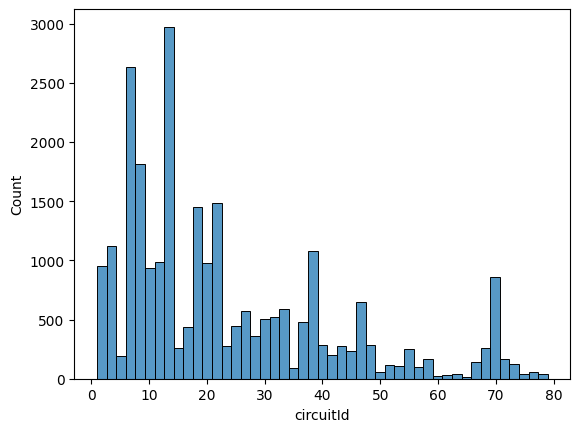

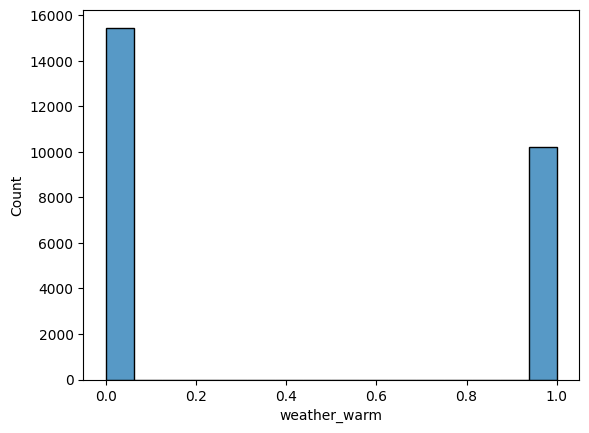

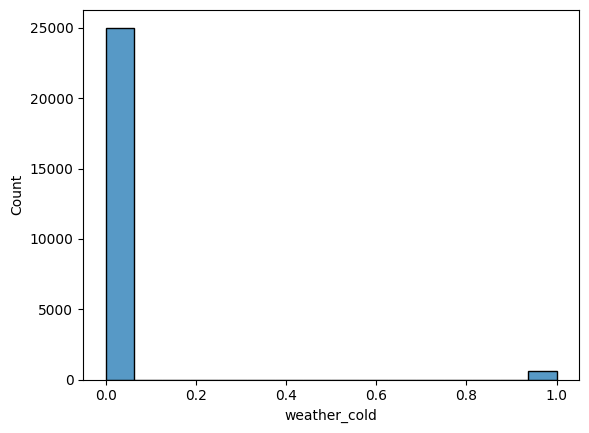

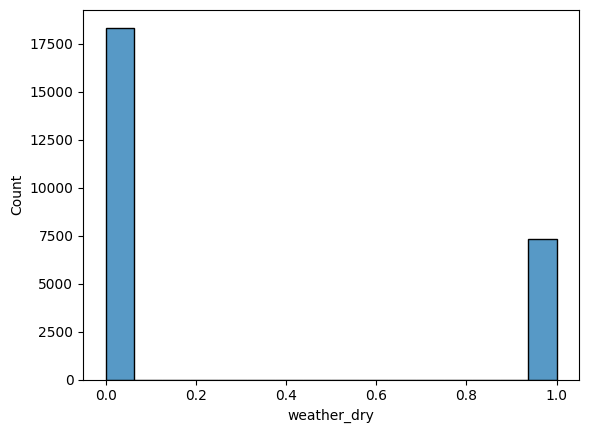

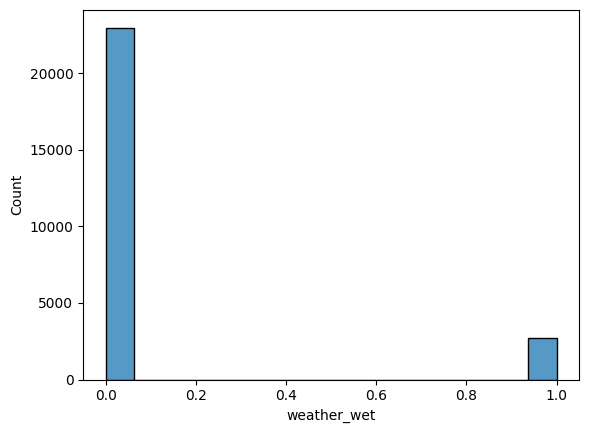

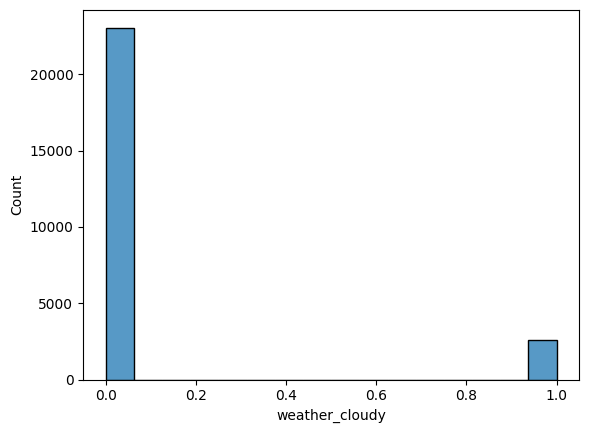

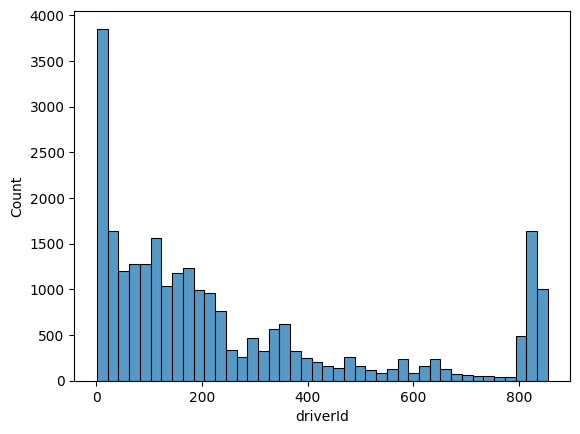

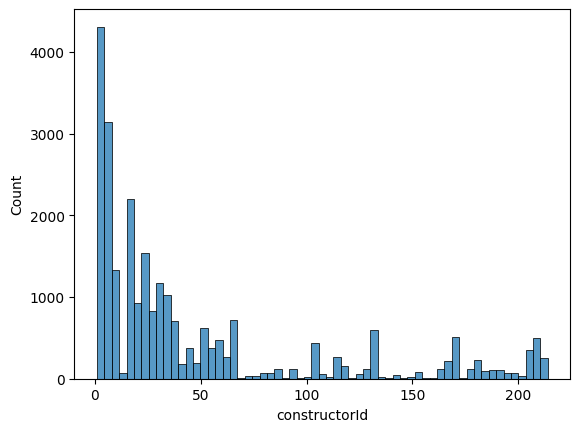

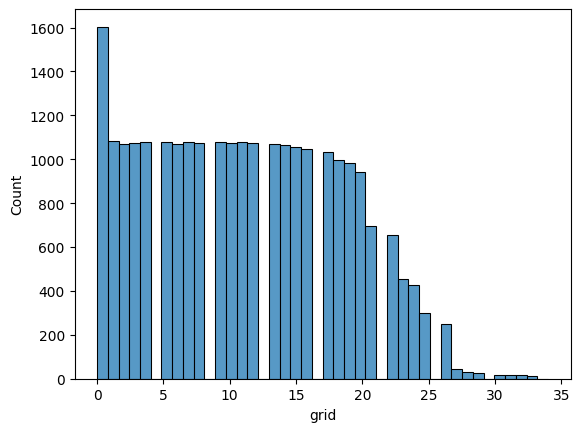

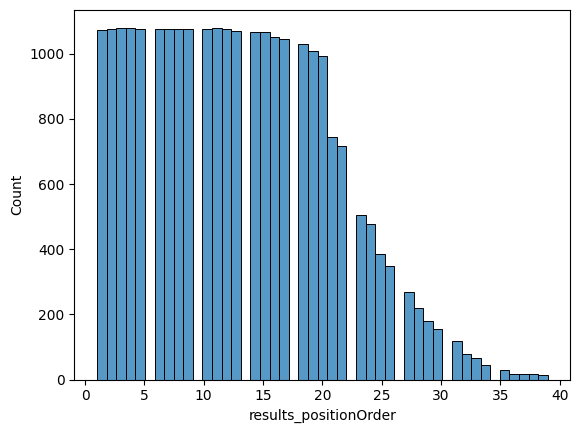

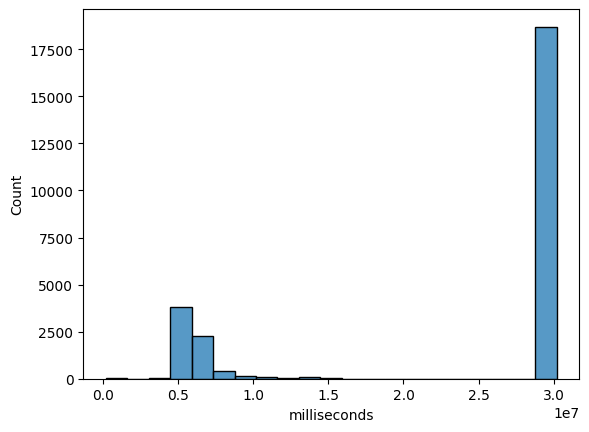

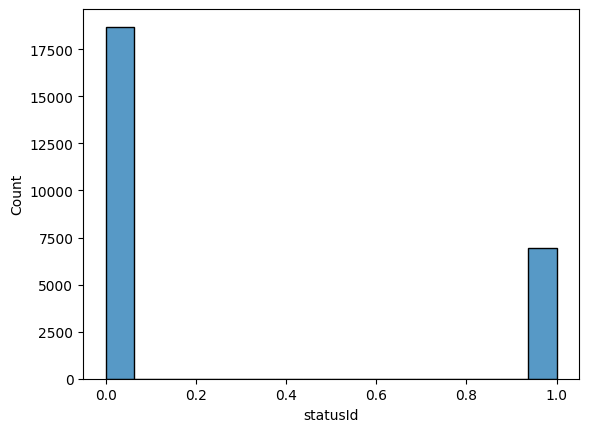

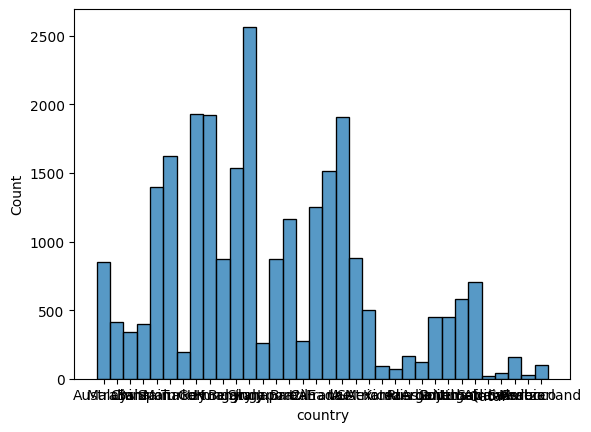

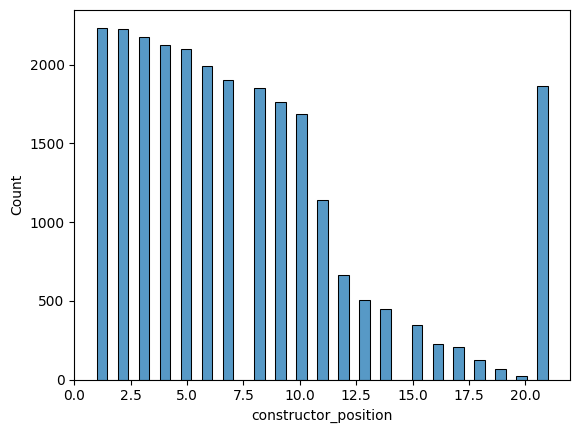

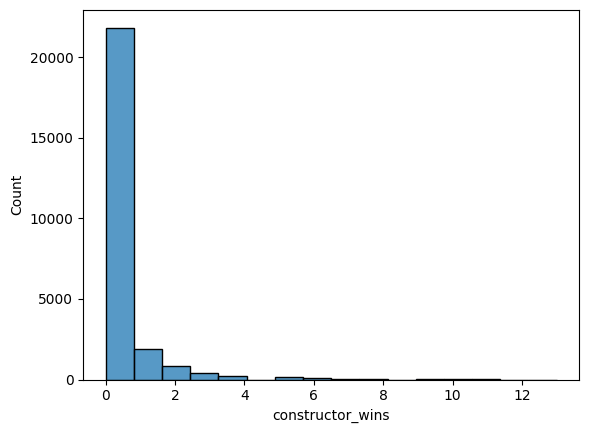

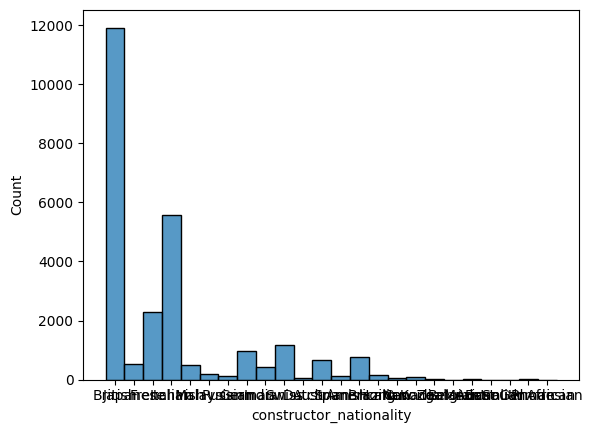

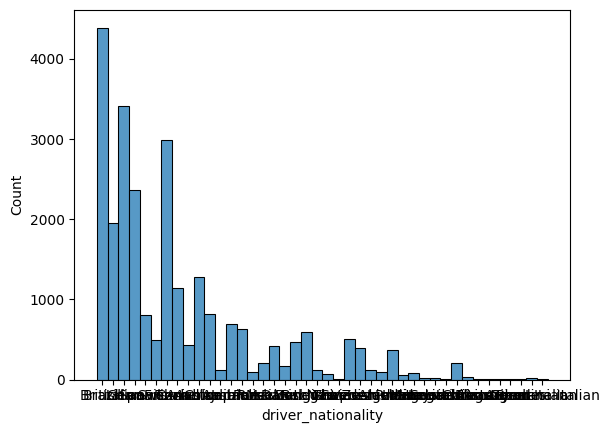

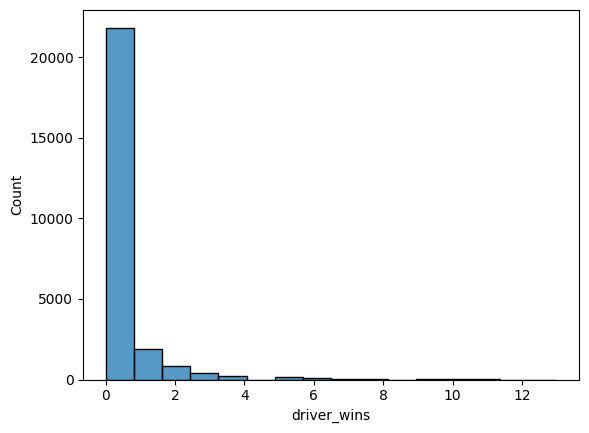

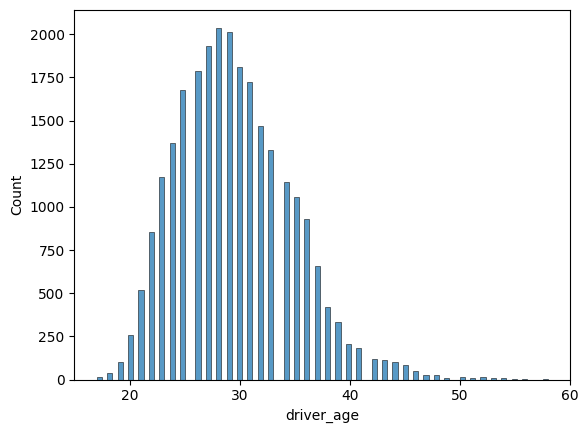

In [45]:
for i in df_after_dropping.columns: 
    sns.histplot(df_after_dropping[i])
    plt.show()

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



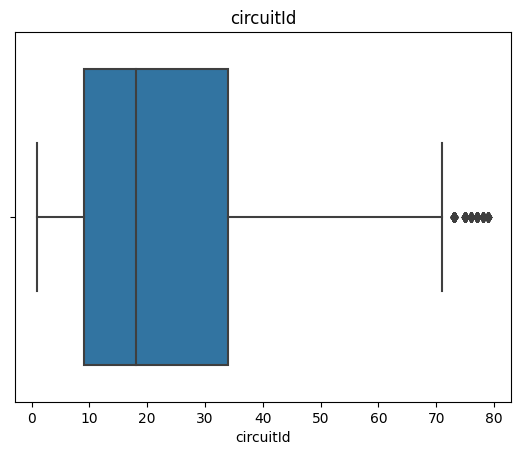

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



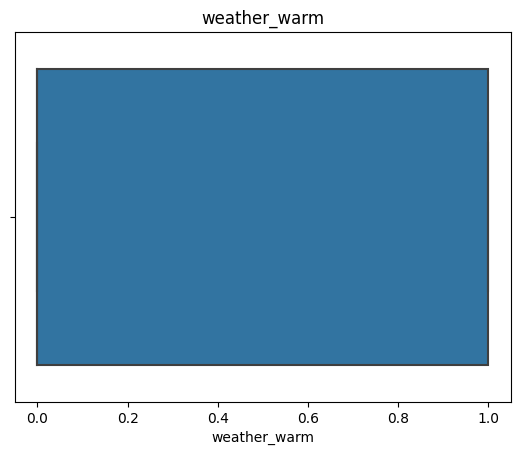

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



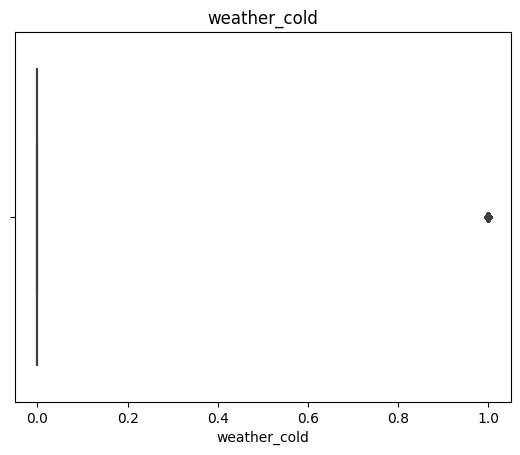

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



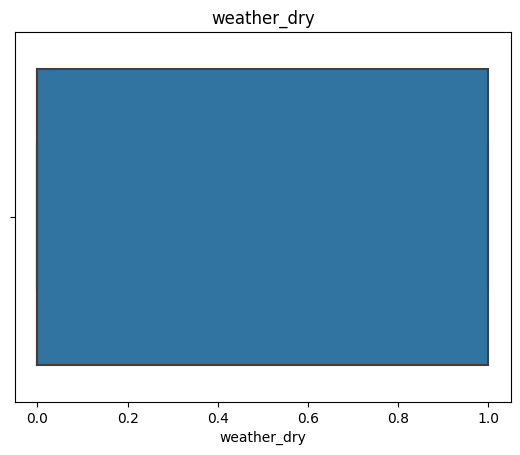

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



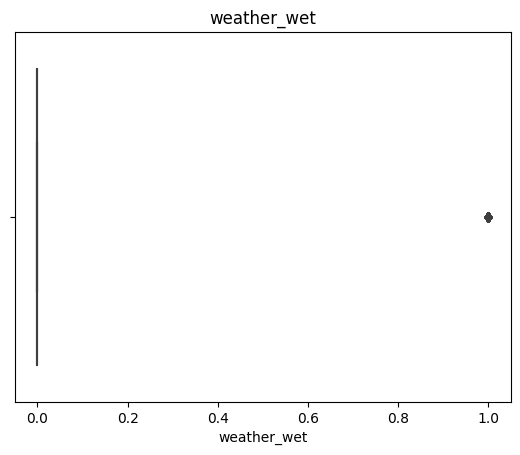

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



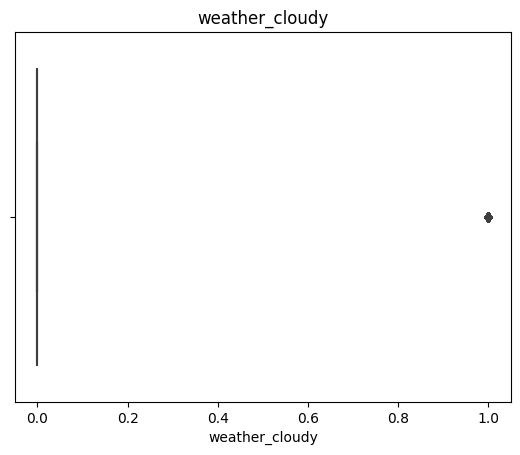

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



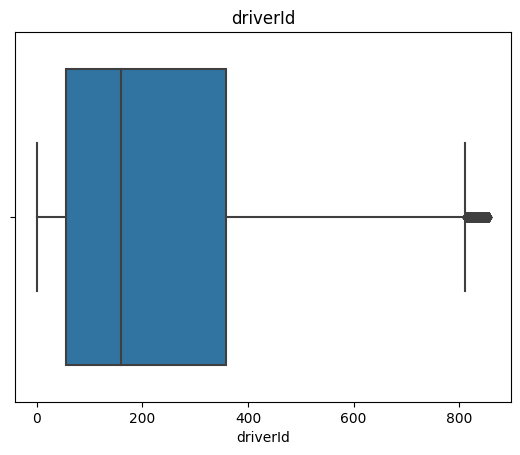

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



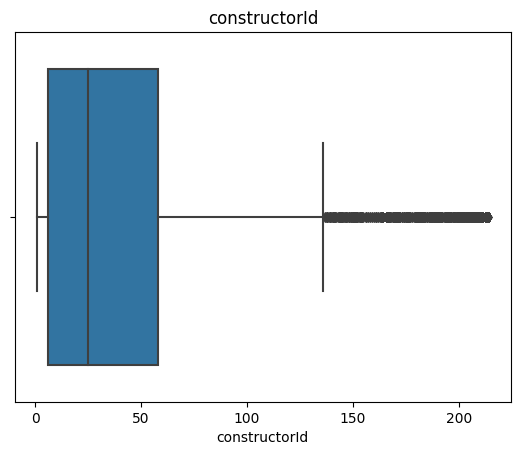

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



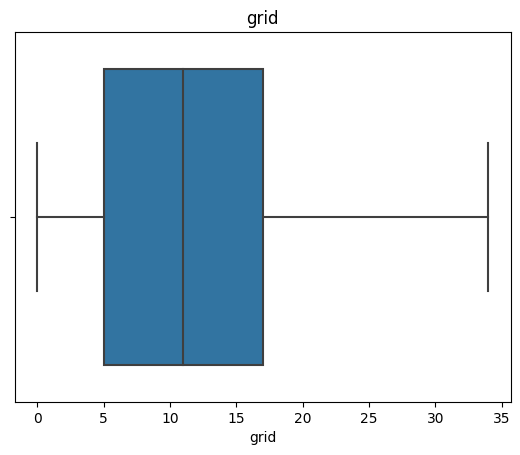

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



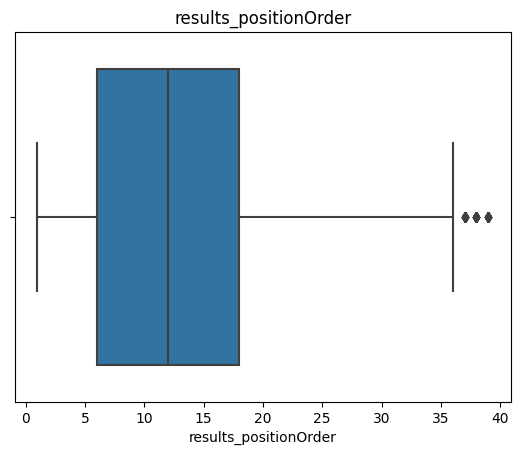

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



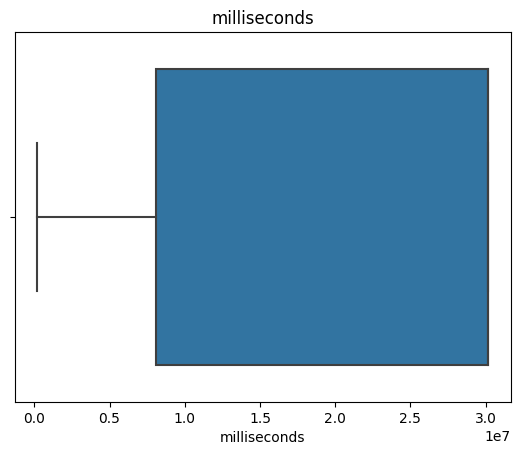

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



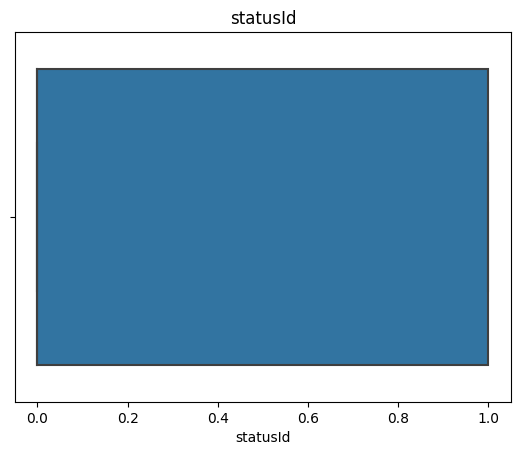

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



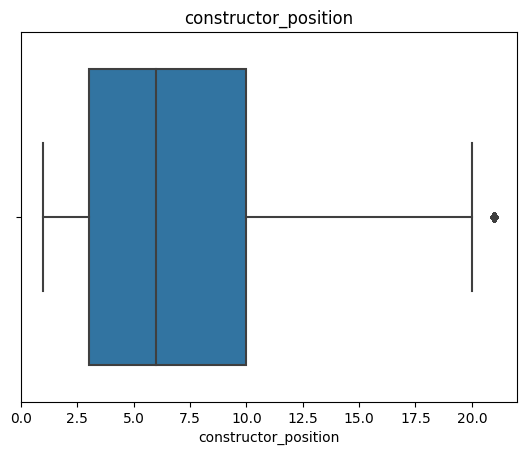

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



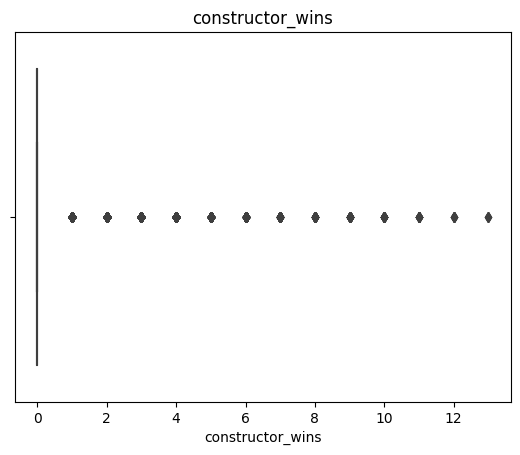

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



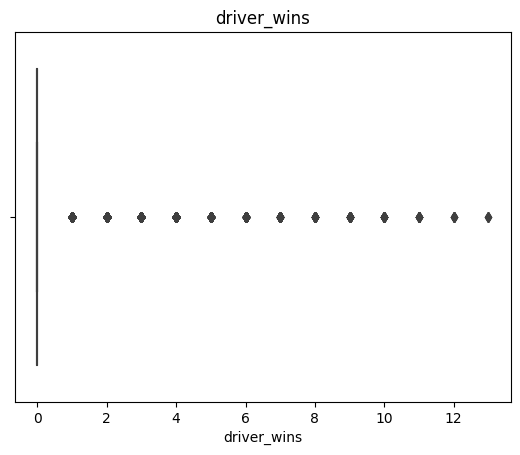

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



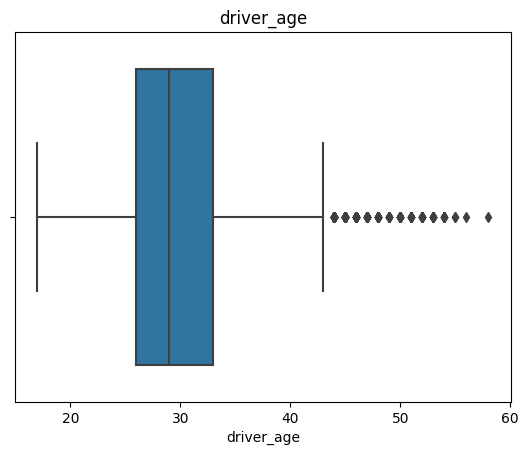

In [46]:
df_num = df_after_dropping.select_dtypes(include=[np.number])
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
upper_limit = df_after_dropping["driver_age"].quantile(0.97)
df_after_dropping['driver_age'] = np.where(df_after_dropping['driver_age'] > upper_limit, upper_limit, df_after_dropping['driver_age'])

41.0

In [55]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
label_encoder = LabelEncoder()
target_encoder = TargetEncoder()

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

